In [1]:
import sys
sys.path.insert(0, '/Users/david/statsbomb/kick_improvement')

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
pd.set_option('display.max_columns', 50)

In [5]:
from clean import clean_kick_data

In [77]:
kick_df = pd.read_csv('../data/field_goals.csv')

In [79]:
kick_df['KickerName'].unique()

array(['J.Tucker', 'S.Gostkowski', 'R.Bironas', 'M.Bryant', 'G.Hartley',
       'N.Folk', 'R.Lindell', 'S.Hauschka', 'R.Gould', 'C.Sturgis',
       'B.Cundiff', 'D.Akers', 'B.Walsh', 'S.Janikowski', 'P.Dawson',
       'G.Zuerlein', 'J.Feely', 'D.Bailey', 'J.Brown', 'A.Henery',
       'K.Forbath', 'R.Bullock', 'N.Novak', 'R.Succop', 'A.Vinatieri',
       'M.Crosby', 'J.Potter', 'D.Carpenter', 'G.Gano', 'J.Scobee',
       'M.Prater', 'S.Suisham', 'M.Nugent', 'S.Graham', 'C.Parkey',
       'C.Santos', 'B.McManus', 'N.Freese', 'C.Catanzaro', 'P.Murray',
       'C.Barth', 'T.Coons', 'A.Franks', 'J.Myers', 'Z.Hocker', 'J.Lambo',
       'K.Brindza', 'D.Hopkins', 'C.Boswell', 'T.Boggs', 'B.Qvale',
       'R.Aguayo', 'W.Lutz', 'G.Tavecchio', 'Z.Gonzalez', 'A.Rosas',
       'Y.Koo', 'K.Fairbairn', 'J.Elliott', 'H.Butker', 'N.Rose',
       'S.Ficken', 'D.Carlson', 'J.Sanders', 'B.Maher', 'J.Hekker',
       'G.Joseph', 'M.McCrane'], dtype=object)

In [82]:
16 * 10 * 17

2720

In [6]:
fg_df = clean_kick_data('../data/field_goals.csv')

In [9]:
fg_df.head()

,FieldGoalDistance,FieldGoalResult,HomeTeam_DEN,HomeTeam_BUF,HomeTeam_PIT,HomeTeam_NO,HomeTeam_NYJ,HomeTeam_CAR,HomeTeam_CHI,HomeTeam_CLE,HomeTeam_DET,HomeTeam_IND,HomeTeam_SF,HomeTeam_STL,HomeTeam_DAL,HomeTeam_WAS,HomeTeam_SD,HomeTeam_NE,HomeTeam_ATL,HomeTeam_PHI,HomeTeam_KC,HomeTeam_HOU,HomeTeam_GB,HomeTeam_BAL,HomeTeam_TB,...,KickerName_S.Graham,KickerName_C.Parkey,KickerName_C.Santos,KickerName_B.McManus,KickerName_C.Catanzaro,KickerName_P.Murray,KickerName_C.Barth,KickerName_T.Coons,KickerName_A.Franks,KickerName_J.Myers,KickerName_J.Lambo,KickerName_D.Hopkins,KickerName_C.Boswell,KickerName_R.Aguayo,KickerName_W.Lutz,KickerName_Z.Gonzalez,KickerName_A.Rosas,KickerName_K.Fairbairn,KickerName_J.Elliott,KickerName_H.Butker,Month_September,Month_October,Month_November,Month_December,Month_January
0,25.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,30.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,48.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,33.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,35.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


### data cleaned, now ready to be modeled)

xg_boost, random_forest, logistic_regression, gradient_boosting

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [12]:
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

In [13]:
y = fg_df['FieldGoalResult']
X = fg_df.drop(axis=1, columns=['FieldGoalResult'])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [16]:
xgboost_model = XGBClassifier(learning_rate = 0.01, max_depth = 3, n_estimators = 300, random_state=8)
gradient_boost_model = GradientBoostingClassifier(learning_rate=0.01, max_depth=4, max_features='log2', min_samples_leaf=4, n_estimators=280, subsample=0.25, random_state=8)
random_forest_model = RandomForestClassifier(n_estimators=300, max_depth=3, verbose=1, random_state=8)
logistic_model = LogisticRegression()

xgboost_model.fit(X_train, y_train)
gradient_boost_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
logistic_model.fit(X_train, y_train)

p_random_forest = random_forest_model.predict_proba(X_test)
p_gradient_boost =  gradient_boost_model.predict_proba(X_test)
p_xgboost = xgboost_model.predict_proba(X_test)
p_logistic = logistic_model.predict_proba(X_test)

#need to concat these two arrays somehow...
ensemble_p_0 = (p_random_forest[:,0] + p_gradient_boost[:,0] + p_xgboost[:,0])/3
ensemble_p_1 = (p_random_forest[:,1] + p_gradient_boost[:,1] + p_xgboost[:,1] + p_logistic[:, 1] ) / 4
# ensemble_p = np.concatenate(ensemble_p_0, ensemble_p_1, axis=0)

random_forest_ll = log_loss(y_test, p_random_forest)
gradient_boost_ll = log_loss(y_test, p_gradient_boost)
xgboost_ll = log_loss(y_test, p_xgboost)
logistic_ll = log_loss(y_test, p_logistic )
ensemble_ll = log_loss(y_test, ensemble_p_1)
                                     

print("Ensemble Log Loss " + str(ensemble_ll))
print("Gradient Boost Log Loss " + str(gradient_boost_ll))
print("Random Forest Log Loss " + str(random_forest_ll))
print("XGBoost Log Loss " + str(xgboost_ll))
print("Logistic Log Loss " + str(logistic_ll))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Ensemble Log Loss 0.377185680815104
Gradient Boost Log Loss 0.3894393499899125
Random Forest Log Loss 0.4032588973646582
XGBoost Log Loss 0.3749042601745331
Logistic Log Loss 0.3687018682298989


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
/Users/david/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


### Visualize probabilities of kickers at difference ranges

In [22]:
columns = fg_df.columns
kick_distances = list(range(20, 65)) #45 total different yard spots


In [28]:
len(kick_distances) #need 45 total "1s" for home team and kicker, 0s for the rest

45

In [29]:
from collections import OrderedDict

### Create function to input hometeam, kickername, and month to run through models

In [44]:
from clean import make_specific_frame

In [49]:
bos_df = make_specific_frame('HomeTeam_SF', 'KickerName_C.Boswell', 'September' )

In [54]:
bos_df.head()

,FieldGoalDistance,HomeTeam_DEN,HomeTeam_BUF,HomeTeam_PIT,HomeTeam_NO,HomeTeam_NYJ,HomeTeam_CAR,HomeTeam_CHI,HomeTeam_CLE,HomeTeam_DET,HomeTeam_IND,HomeTeam_SF,HomeTeam_STL,HomeTeam_DAL,HomeTeam_WAS,HomeTeam_SD,HomeTeam_NE,HomeTeam_ATL,HomeTeam_PHI,HomeTeam_KC,HomeTeam_HOU,HomeTeam_GB,HomeTeam_BAL,HomeTeam_TB,HomeTeam_ARI,...,KickerName_S.Graham,KickerName_C.Parkey,KickerName_C.Santos,KickerName_B.McManus,KickerName_C.Catanzaro,KickerName_P.Murray,KickerName_C.Barth,KickerName_T.Coons,KickerName_A.Franks,KickerName_J.Myers,KickerName_J.Lambo,KickerName_D.Hopkins,KickerName_C.Boswell,KickerName_R.Aguayo,KickerName_W.Lutz,KickerName_Z.Gonzalez,KickerName_A.Rosas,KickerName_K.Fairbairn,KickerName_J.Elliott,KickerName_H.Butker,Month_September,Month_October,Month_November,Month_December,Month_January
0,20,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,21,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,22,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,24,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
p_random_forest = random_forest_model.predict_proba(bos_df)
p_gradient_boost =  gradient_boost_model.predict_proba(bos_df)
p_xgboost = xgboost_model.predict_proba(bos_df)
p_logistic = logistic_model.predict_proba(bos_df)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished


### visualization

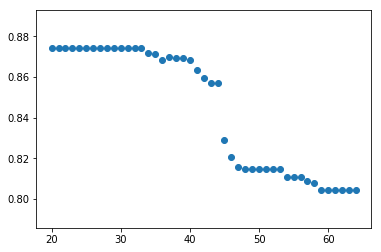

In [55]:
plt.scatter(bos_df['FieldGoalDistance'], p_random_forest[:, 1])

<BarContainer object of 45 artists>

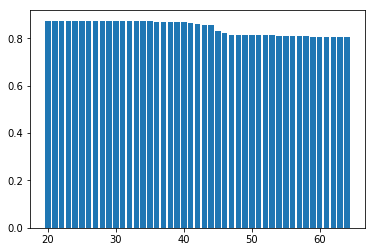

In [65]:
plt.bar(bos_df['FieldGoalDistance'], p_random_forest[:, 1])

<BarContainer object of 45 artists>

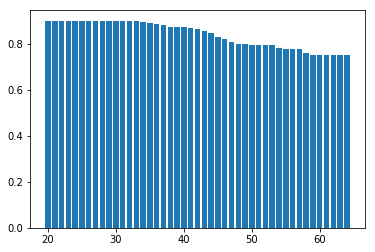

In [66]:
plt.bar(bos_df['FieldGoalDistance'], p_gradient_boost[:, 1])

<BarContainer object of 45 artists>

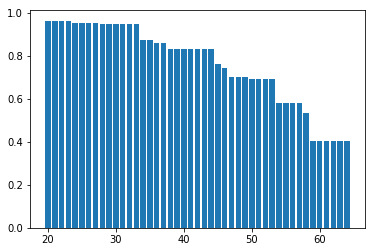

In [67]:
plt.bar(bos_df['FieldGoalDistance'], p_xgboost[:, 1])

<BarContainer object of 45 artists>

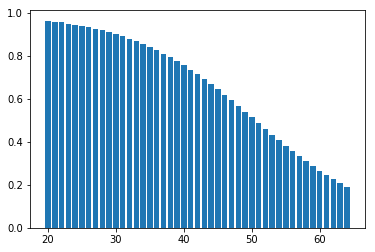

In [68]:
plt.bar(bos_df['FieldGoalDistance'], p_logistic[:, 1])

In [69]:
import pickle

log_pkl_filename = 'log.pkl'
log_pkl = open(log_pkl_filename, 'wb')
pickle.dump(logistic_model, log_pkl)
log_pkl.close()

### created one function where you input stadium, kickername, month - returns visual

In [72]:
from clean import make_kicker_prob

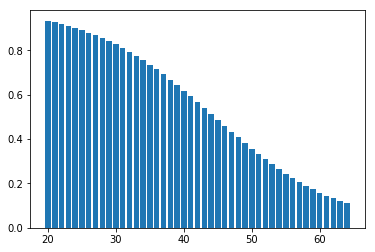

In [83]:
make_kicker_prob('HomeTeam_SEA', 'KickerName_S.Haushka', 'September' )

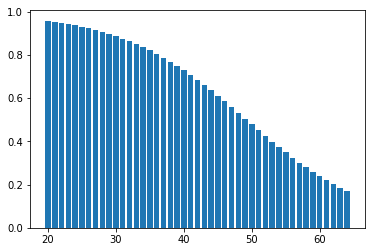

In [84]:
make_kicker_prob('HomeTeam_SEA', 'KickerName_D.Bailey', 'September' )

# Heat Map Kicker Comparison

In [86]:
from clean import get_probs

In [89]:
d_bailey = get_probs('HomeTeam_SEA', 'KickerName_D.Bailey', 'September')[:, 1]
s_haushka = get_probs('HomeTeam_SEA', 'KickerName_S.Haushka', 'September')[:, 1]
s_janikowski = get_probs('HomeTeam_SEA', 'KickerName_S.Janikowski', 'September')[:, 1]
h_butker= get_probs('HomeTeam_SEA', 'KickerName_H.Butker', 'September')[:, 1]

In [90]:
import plotly.plotly as py
import plotly.graph_objs as go

trace = go.Heatmap(z=[d_bailey, s_haushka, s_janikowski, h_butker],
                   x=list(range(20, 65)),
                   y=['D. Bailey', 'S.Haushka', 'S.Janikowski', 'H.Butker'])
data=[trace]
py.iplot(data, filename='labelled-heatmap')